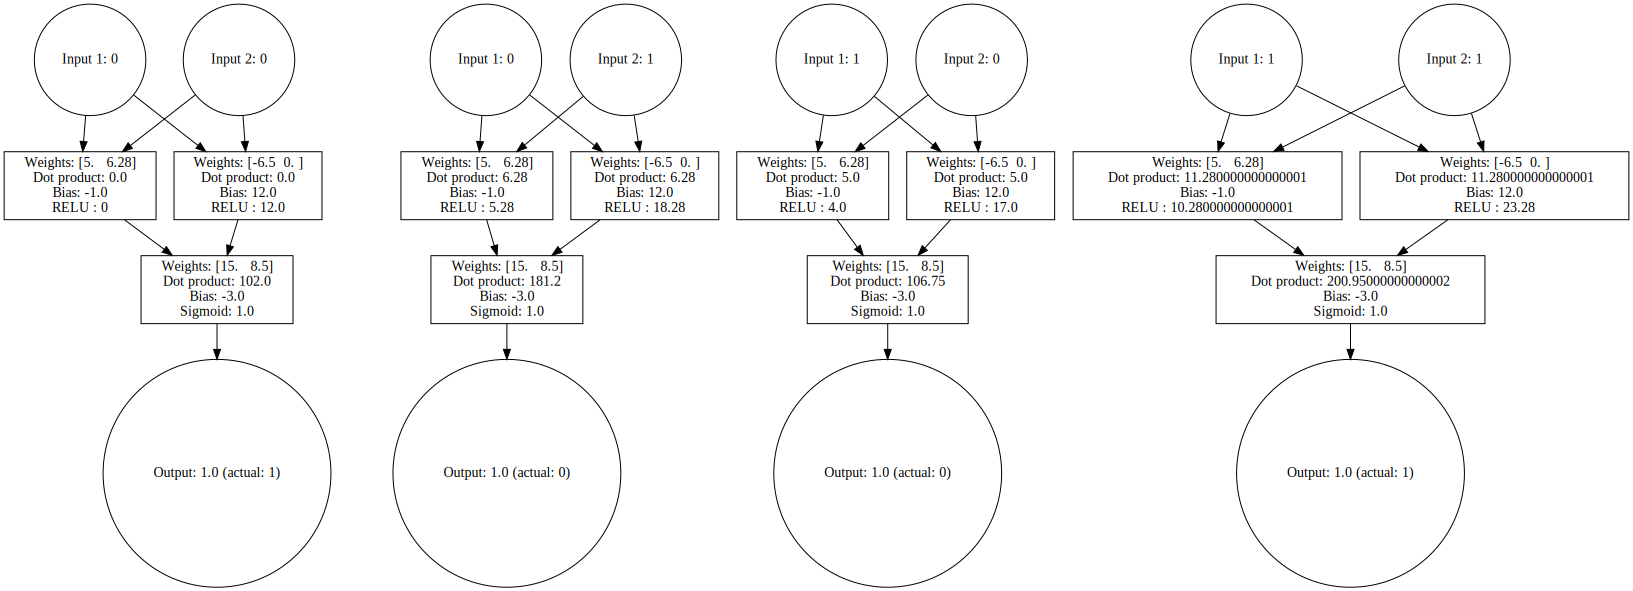

In [1]:
import numpy as np
import graphviz as gv

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def relu(x):
    return max(0, x)

def predict(w, x):
    a = np.zeros((3,))
    a[2] = relu(np.dot(x,w[6:8]) + w[8])

    a[1] = relu(np.dot(x,w[3:5]) + w[5])

    a[0] = sigmoid(np.dot(a[1:3], w[0:2]) + w[2])
    return a[0]

def create_neural_network_graph(X, Y, w):
    nn_graph = gv.Digraph('NeuralNetwork')
    
    for i, x in enumerate(X):
        nn_graph.node(f'input1_{i}', f'Input 1: {x[0]}', shape='circle')
        nn_graph.node(f'input2_{i}', f'Input 2: {x[1]}', shape='circle')
        
        dot_product_1 = np.dot(x, w[3:5])
        dot_product_2 = np.dot(x, w[6:8])

        nn_graph.node(f'relu1_{i}', f'Weights: {w[3:5]}\nDot product: {dot_product_1}\nBias: {w[5]}\nRELU : {relu(dot_product_1 + w[5])} ', shape='rectangle')
        nn_graph.node(f'relu2_{i}', f'Weights: {w[6:8]}\nDot product: {dot_product_1}\nBias: {w[8]}\nRELU : {relu(dot_product_1 + w[8])} ', shape='rectangle')


        
        dot_product_3 = np.dot([relu(dot_product_1 + w[5]), relu(dot_product_2 + w[8])], w[0:2])
        nn_graph.node(f'sigmoid_{i}', f'Weights: {w[0:2]}\nDot product: {dot_product_3}\nBias: {w[2]} \nSigmoid: {sigmoid(dot_product_3 + w[2])}  ', shape='rectangle')

  
        
        nn_graph.node(f'output_{i}', f'Output: {predict(w, x)} (actual: {Y[i]})', shape='circle')

        nn_graph.edges([(f'input1_{i}', f'relu1_{i}'), (f'input1_{i}', f'relu2_{i}'), (f'input2_{i}', f'relu1_{i}'), (f'input2_{i}', f'relu2_{i}')])
        nn_graph.edges([(f'relu1_{i}', f'sigmoid_{i}'), (f'relu2_{i}', f'sigmoid_{i}')])
        nn_graph.edge(f'sigmoid_{i}', f'output_{i}')

    return nn_graph


w = np.array([15, 8.5, 
              -3, 
              5, 6.28, 
              -1,
              -6.5, 0,
              12])


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Y = np.array([1, 0, 0, 1])

nn_graph = create_neural_network_graph(X, Y, w)

#nn_graph.render('neural_network_data_flow_with_weights.gv', view=True)
display(nn_graph)